<a href="https://colab.research.google.com/github/rgoding2004/w207/blob/main/Ryan_Goding_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Digit Classification Naive Bayes

**Solution**

# Intro
---
In this project, you'll continue working on your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. 
As always, you're welcome to work on the project in groups and discuss ideas over Slack, but <b> please prepare your own write-up (with your own code). </b>


## Grading
---
 - Make sure to answer every part in every question.
 - There are 6 questions, each equally weighted and an additional bonus question.
 - The extra credit question will be graded based on your attempts at feature engineering and resulting improved accuracy.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean, well commented,
  -  if the functions or answers are too long.

## Requirements:
---
1. Comment your code.
1. All graphs should have titles, label for each axis, and if needed a legend. It should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning keep things in functions).

## Additional Reading and notes
---
If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [ ]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [ ]:
import sklearn
sklearn.__version__

'0.22.2.post1'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [ ]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Question 1: Applying a smoothing using numpy.
---

A common image processing technique is to smooth an image by **blurring**. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

1. Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.
1. Choose some weights as a starting point. Produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
  1. Do not use the filter
  1. Filter the training data but not the dev data
  1. Filter the dev data but not the training data
  1. Filter both training data and dev data
1. Show the accuracies of the four models evaluated as described. What do you see? Can you explain why this is?
1. Experiment with weights that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* A good trick to simplify your code is to use numpy's pad function to add 0s around your original array so you don't have to deal with "edge cases".
* In addition, you can use numpy to multiply and sum slices of two arrays.
* [This notebook](https://colab.research.google.com/drive/1eJXTQLtREXQjQIsLOA9uCrBl6B049-pO) might help shows some example numpy code.
* In general, [numpy operations will be much faster than for loops](https://colab.research.google.com/drive/1KJI4JtuIqVdyZHTTe_mAlKYA5XdLFp3_). 
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but in this question, please implement your own.

In [ ]:
def Q1():
    
### STUDENT START ###
  def accuracy(predicted_list):
      correct, total = 0,0
      for i in range(len(predicted_list)):
        if predicted_list[i] == dev_labels[i]:
          correct +=1
          total +=1
        else:
          total +=1 
      #Print Accuracy Results
      print('total: %3d correct: %3d accuracy: %3.2f' %(total, correct, 100*correct/total)+'%\n')

  neigh_q1 = KNeighborsClassifier(1)
  #Show Results with No filter
  predict_list =[]
  neigh_q1.fit(mini_train_data, mini_train_labels)
  predict_list = neigh_q1.predict(dev_data)
  print('Accuracy for 1-Nearest Neighbor Model without any filtering:')
  accuracy(predict_list)

  #Filter Function
  def filter(data):
    array_list =[]
    for array in data:
      weight = (1/9)
      #Create temp array for new calc values
      temp_array = np.zeros((30,30))
      #reshape each array in mini_train_data
      #deep copy array
      array_copy = array.copy()
      re_shape = np.reshape(array_copy, (28,28))
      #pad zeros around reshaped training data array
      re_shape_pad = np.pad(re_shape, [(1,1), (1,1)], mode = 'constant', constant_values = 0)
      #calc new pixel values
      #row counter
      for i in range(29):
        #column counter
        for j in range(29):
          temp_array[i,j] = weight*(np.sum(re_shape_pad[j-1,i-1:i+2:1]) + np.sum(re_shape_pad[j+1, i-1:i+2:1]) \
          + re_shape_pad[j, i-1] + re_shape_pad[j, i+1])
      #Remove padded rows and columns
      #delete first column and last column in temp_array
      temp_array = np.delete(temp_array, [0,29], 1)
      #delete first row and last row in temp_array
      temp_array = np.delete(temp_array, [0,29], 0)
      array_list.append(temp_array)
    #change list of arrays to array of arrays
    A = np.array(array_list)
    #reshape array of arrays
    A_reshape = np.reshape(A, (1000,784))
    return A_reshape
  
  #filter training data
  filter(mini_train_data)
  #store for later use
  filter_training_data = A_reshape
  #training on new filtered train set
  neigh_q1.fit(A_reshape, mini_train_labels)
  predict_list = neigh_q1.predict(dev_data)
  print('Accuracy for 1-Nearest Neighbor Model with only mini_train_data filtering:')
  accuracy(predict_list)

  #filter dev data
  filter(dev_data)
  #store for later use
  filter_dev_data = A_reshape
  neigh_q1.fit(mini_train_data, mini_train_labels)
  #predict on filtered dev set
  predict_list = neigh_q1.predict(A_reshape)
  print('Accuracy for 1-Nearest Neighbor Model with only dev_data filtering:')
  accuracy(predict_list)

  #filter both dev data and training data
  neigh_q1.fit(filter_training_data, mini_train_labels)
  predict_list = neigh_q1.predict(filter_dev_data)
  print('Accuracy for 1-Nearest Neighbor Model with bith dev_data and mini_train_data filtered:')
  accuracy(predict_list)

### STUDENT END ###

Q1()

Accuracy for 1-Nearest Neighbor Model without any filtering:
total: 1000 correct: 884 accuracy: 88.40%

Accuracy for 1-Nearest Neighbor Model with only mini_train_data filtering:
total: 1000 correct: 130 accuracy: 13.00%

Accuracy for 1-Nearest Neighbor Model with only dev_data filtering:
total: 1000 correct:  97 accuracy: 9.70%

Accuracy for 1-Nearest Neighbor Model with bith dev_data and mini_train_data filtered:
total: 1000 correct: 114 accuracy: 11.40%



### Question 2: Modeling your data and experimenting with different Naive Bayes models. 
---

1. Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.
  1. For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.
  1. For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Here you'll likely need to implement a `trianarize` helper function. Since we are going beyond the binary representation of our features, you should use `MultinomialNB` to produce the model.
1. Show the Bernoulli model accuracy and the Multinomial model accuracy.
1. Does the multinomial version improve the results? Why or why not?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.



In [ ]:
# Solution with binarization by explicit binarize function

def Q2():
  def accuracy(predicted_list):
    correct, total = 0,0
    for i in range(len(predicted_list)):
      if predicted_list[i] == dev_labels[i]:
        correct +=1
        total +=1
      else:
        total +=1 
    #Print Accuracy Results
    print('total: %3d correct: %3d accuracy: %3.2f' %(total, correct, 100*correct/total)+'%\n')

### STUDENT START ###
#preprocess data for second model
  mini_train_data_grayscale = mini_train_data.copy()
  for array in mini_train_data_grayscale:
    for i in range(len(array)):
      if array[i] > .9:
        array[i] = 2
      elif .1 <= array[i] <= .9:
        array[i] = 1
      else:
        array[i] = 0
        
 
  #create two Naive Bayes Models
  model_1 = BernoulliNB(binarize=.1)
  model_2 = MultinomialNB()
  
  #fit model 1
  model_1.fit(mini_train_data, mini_train_labels)
  #run prediction on dev_data
  model_1_predict_list = model_1.predict(dev_data)
  #run accuracy function on model_1
  print('Accuracy for Bernoulli Model:')
  accuracy(model_1_predict_list)

  #fit model 2
  model_2.fit(mini_train_data_grayscale, mini_train_labels)
  model_2_predicted_list = model_2.predict(dev_data)
  print('Accuracy for Multinomial Model:')
  accuracy(model_2_predicted_list)
### STUDENT END ###

Q2()

Accuracy for Bernoulli Model:
total: 1000 correct: 834 accuracy: 83.40%

Accuracy for Multinomial Model:
total: 1000 correct: 811 accuracy: 81.10%






ANSWER: The multinomial model is performing worse than the Bernouilli model because it is treating white, gray, and black as features that are independent of each other and because of this it is losing information.  This is not how handwriting works.  If you have a pixel that is gray, the next pixel is likely to be grey or a a little darker or a little lighter.  The next pixel is unlikely to be completely different from the neighboring pixel. 


### Question 3: Applying the grid search technique.
1. Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.
1. What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.



In [ ]:
def Q3(alphas):

### STUDENT START ###
  
  #create BernoulliNB model with binarization threshold set to zero
  q3_model = BernoulliNB(binarize=0)
  #fit to mini_train_data set
  q3_model.fit(mini_train_data, mini_train_labels)
  #set grid to vary alphas
  grid = GridSearchCV(estimator = q3_model, param_grid=alphas, scoring='accuracy')
  grid.fit(mini_train_data, mini_train_labels)
  print('The mean test score for each Laplace Smoothing Parameter is:')
  print(grid.cv_results_['mean_test_score'])


### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
Q3(alphas)


The mean test score for each Laplace Smoothing Parameter is:
[0.814 0.819 0.825 0.822 0.818 0.813 0.809 0.805 0.783]


ANSWER: The best value for alpha is 0.825 for an alpha value of 0.001.  The accuracy for alphas when it is near zero is 0.814. It was expected that lower values of alpha would produce better test scores.  As the value of alpha increases the expected likehood is 0.5 and this doesn't provide much information for the model.

### Question 4: Experimenting with Gaussian Naive Bayes
---
1. Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. 
1. Diagnose and explain the problem.
1. Apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. 
1. Show the model accuracy before your fix and the model accuracy after your fix.  
1. Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Take a look at var_smoothing argument for GaussianNB.
* Feel free to  examine theta and sigma to better understand what's happening. In general though, **it is not a good idea to mess with internal variables of the model**. These are stored in the model's `theta_` and `sigma_` attributes.

In [ ]:
def Q4():

### STUDENT END ###

  def accuracy(predicted_list):
      correct, total = 0,0
      for i in range(len(predicted_list)):
        if predicted_list[i] == dev_labels[i]:
          correct +=1
          total +=1
        else:
          total +=1 
      #Print Accuracy Results
      print('total: %3d correct: %3d accuracy: %3.2f' %(total, correct, 100*correct/total)+'%\n')

  model_q4 = GaussianNB()
  model_q4.fit(mini_train_data, mini_train_labels)
  predict_list = []
  predict_list = model_q4.predict(dev_data)
  print('Gaussian Naive Bayes Performance:')
  accuracy(predict_list)

  #Apply Fix, variance smoothing, to Gaussian Naive Bayes
  model_q4_fix = GaussianNB(var_smoothing=.1)
  model_q4_fix.fit(mini_train_data, mini_train_labels)
  predict_list_fix =[]
  predict_list_fix = model_q4_fix.predict(dev_data)
  print('Gaussian Naive Bayes with fix performance:')
  accuracy(predict_list_fix)

### STUDENT END ###

Q4()

Gaussian Naive Bayes Performance:
total: 1000 correct: 593 accuracy: 59.30%

Gaussian Naive Bayes with fix performance:
total: 1000 correct: 817 accuracy: 81.70%



ANSWER: The problem is that the Gaussian NB model is assuming that the pixels in each class will follow a normal distribution. The low accuracy without the fix shows this assumtion does not apply to our mini_train_data set.  By applying variance smoothing the largest variance of the specified features is added to the variances and stablizes the calculations.

### Question 5: Naive Bayes as a generative model
---
Because Naive Bayes produces a generative model, you can use it to generate digit images.

1. Produce a Bernoulli Naive Bayes model and then use it to generate a 10x10 grid with 10 example images of each digit. Each pixel output will be either 0 or 1: randomly generating a number and then comparing it to the estimated probability of the pixel being either 0 or 1.  Show the grid.
1. How do the generated digit images compare to the training digit images?

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.



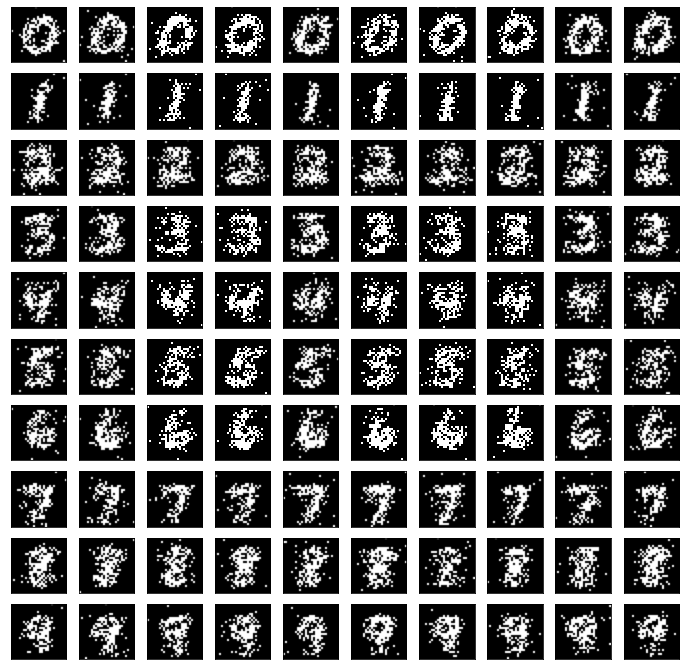

In [ ]:
def Q5(num_examples):

### STUDENT START ###
  #Create BernoulliNB Model to estimate each pixel probability being 0 or 1
  model_q5 = BernoulliNB(binarize=.1)
  array_list = []
  #fit model_q5
  model_q5.fit(mini_train_data, mini_train_labels)
  #create temp empty array
  temp_array = np.zeros((784,1))

  #counter for each class
  for i in range(10):
    #counter for 10 examples of each class
    for p in range(num_examples):
      #counter for each pixel prob by Bernoulli NB model
      for j in range(len(model_q5.feature_log_prob_[i])):
        #if the probability for specified class is larger than random binom number, make black
        if np.exp(model_q5.feature_log_prob_[i][j]) > np.random.rand():
          temp_array[j] = 1
        #else make white
        else:
          temp_array[j] = 0
      #add temp array to array list
      array_list.append(temp_array) 
      #reset temp array
      temp_array = np.zeros((784,1))

  #Create 10x10 plot of 10 examples each class
  plt.figure(figsize = (12,12))
  for i in range(len(array_list)):
    plt.subplot(num_examples,num_examples,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #reshape array
    array_reshaped = np.reshape(array_list[i], (28,28))
    plt.imshow(array_reshaped, cmap = 'gray')
  plt.show()

### STUDENT END ###

Q5(10)

ANSWER: The generated images are much fuzzier than the training images but you can still tell what numbers they are representing.

### Question 6: Model Calibraiton
---
Recall that:
 * a **strongly calibrated** classifier is rougly 90% accurate when it says it is 90% accurate. The model's estimated posterior probability of the predicted class is indeed 0.9. 
 * A **weakly calibrated** classifier is more accurate when it "says" it is more accurate. The actual accuracy is higher when the model's estimated posterior probability is higher.
 * A **poorly calibrated** classifier has no positive correlation between the model's estimate posterior probability and the actual accuracy.

1. Produce a Bernoulli Naive Bayes model.  
1. Evaluate performance: 
  1. Partition the dev set into several buckets based on the estimated posterior probabilities of the predicted classes (predict_proba)
    - Think of it as a bin in a histogram, where each bin groups a range of estimated posterior probabilities of the predicted classes (predict_proba).
    - Then estimate the actual accuracy the classifier achieved for each bucket. 
    - So, for each prediction:
       - Find the bucket whose range includes the estimated posterior probability, 
       - and update "correct" and "total" counters accordingly. 
       - Show the accuracy for each bucket.
1. How would you characterize the calibration for this Bernoulli Naive Bayes model according to the definitions above?

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.



In [ ]:
def Q6(buckets):
    
### STUDENT START ###
  predict_list_q6 = []
  prob_list = []
  #create BernoulliNB Model, with binarization threshold set to 0
  model_q6 = BernoulliNB(alpha=.001, binarize= 0 )
  #fit model to training data
  model_q6.fit(mini_train_data, mini_train_labels)
  #Predict labels using test data
  predict_list_q6 = model_q6.predict(dev_data)
  #Estimated posterior prob using test data
  prob_list = model_q6.predict_proba(dev_data)

  #Loop to cycle through bucket list
  for bucket in buckets:
    bucket_total = 0
    bucket_correct = 0
    accuracy = 0
    for i in range(len(mini_train_data)):
      predicted_label = predict_list_q6[i]
      #max value of posterior probability
      predict_prob = max(prob_list[i])
      true_label = mini_train_labels[i]
      #check if predicted prob is less than or equal to bucket
      if predict_prob <= bucket:
        bucket_total +=1 
      elif predicted_label == true_label:
        bucket_correct +=1
        bucket_total +=1
    print('The accuracy for ' + str(bucket) + ' bucket is: ' + str(bucket_correct/bucket_total))
  ### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]

Q6(buckets)

The accuracy for 0.5 bucket is: 1.0
The accuracy for 0.9 bucket is: 0.7919463087248322
The accuracy for 0.999 bucket is: 0.5377358490566038
The accuracy for 0.99999 bucket is: 0.4053030303030303
The accuracy for 0.9999999 bucket is: 0.3233333333333333
The accuracy for 0.999999999 bucket is: 0.2535211267605634
The accuracy for 0.99999999999 bucket is: 0.22597402597402597
The accuracy for 0.9999999999999 bucket is: 0.19953051643192488
The accuracy for 1.0 bucket is: 0.0





ANSWER: From the results above this BernoulliNB model is poorly calibrated as there is no positive correlation between posterior probablity and actual accuracy. 

### Question 7 EXTRA CREDIT: Feature generation
---
1. Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.
1. Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

**Note that improving results is actually hard.**

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try implementing [*maxpool*](https://computersciencewiki.org/index.php/Max-pooling_/_Pooling) features, taking a rolling maximum over sub-regions of a the image. 
- In any case, you can either transform the original data or add new "features" to it.

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [ ]:
def Q7():

### STUDENT START ###

### STUDENT END ###

Q7()